# Machine Learning: Basic Principles

## Regularization and Validation

## Learning goals
In this exercise, you will learn how to do model selection. In order to select the best model, we have to make sure that the model doesn't only work well on the training data, but also on unseen data. This phenomen of only performing well on training data is referred to as overfitting. To check if a model is overfitting, we will start splitting our dataset into two, the training data and validation data. We then add regularization to the Polynomial Regression model of round 2, which is a way to combat overfitting. 

### Exercise Content
1. Dataset
2. Exercise
    - The exercise consists of 2 tasks. Carefully read the task descriptions and instructions.
        - 2.1 Validation 
        - 2.2 Regularized Polynomial Regression

### Keywords
`Regularized Polynomial Regression`, `Validation`, `Model Selection`

##  1. Dataset
We are reusing a **subset** of the data on Ethereum and Bitcoin presented in round `2.Regression`. The data to be explored is stored in one file, *BTC_ETH_round4.csv*.

**Note**: this file is different than the ones you used in round 2, so if you are working locally, make sure you have the correct files in place! In JupyterHub this is automatically taken care of. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#Read the data
df=pd.read_csv('BTC_ETH_round4.csv')
x=df.Bitcoin.values #Bitcoin values
y=df.Ethereum.values #Ethereum values

#Reshape the data. 
#This is really important for the matrix multiplication later on!
x=np.reshape(x,(len(x),1))
y=np.reshape(y,(len(y),1))

#Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x, y) 
plt.title(r'$\bf{Figure\ 1.}$ Bitcoin vs Ethereum')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.show()

<Figure size 600x600 with 1 Axes>

## 2. Exercise
The actual exercise starts from here and it consists of 2 tasks:
* 2.1 **Validation** 
* 2.2 **Regularized Polynomial Regression**

Your task is to fill in `### STUDENT TASK ###` in each step.

## 2.1 Validation

The purpose of machine learning is to develop a model using existing data and use this trained model to predict new, unseen datapoints. In practice, we often don't know which model will give the best performance, hence it is a common approach to apply several models to the same problem and then to choose the best one. This is called model selection. 

In order to choose this best model, we need to have a systematic way of validating the different models, i.e. to measure the performance of the models.  We want  to ensure our model generalizes well and is not fitting to the noise in our training data. To do so, it is important to not only measure the performance on data that has already been seen during training, i.e. training data, but also on unseen data. We call this unseen data that we use to validate our model, the validation data. 

In order to make sure our model generalizes well, we want to avoid overfitting. Overfitting usually occurs when we try to follow our training data too closely, producing really low training error, but when we apply the model to unseen data our error skyrockets. We use the validation data to test for overfitting. 
We split the dataset into training data and validation data. We then train our model with the training data only, and compute two times the empirical error: once on the training set and once on the validation set. We then select the model with the lowest validation error as our best model.

In this task, we will compute the two errors for Polynomial Regression of different degrees. 


### Tasks

- Implement a Python function `trainValErrors()` which takes as inputs the training data, validation data and a list of degrees. And gives as output 3 vectors which contain for every degree the optimal weight, *w_opts*, the training error, *training_errors* and the validation error, *validation_errors* :
    - Use the given functions, these are the same as the ones used for Polynomial Regression in round 2.
    - First get the optimal weights by only using the training data
    - Then compute the empirical risk separately for the training data and validation data

,Degrees,Training errors,Validation errors
0,1,0.047725,0.085636
1,2,0.005044,0.018037
2,3,0.003882,0.013717
3,4,0.003613,0.021369


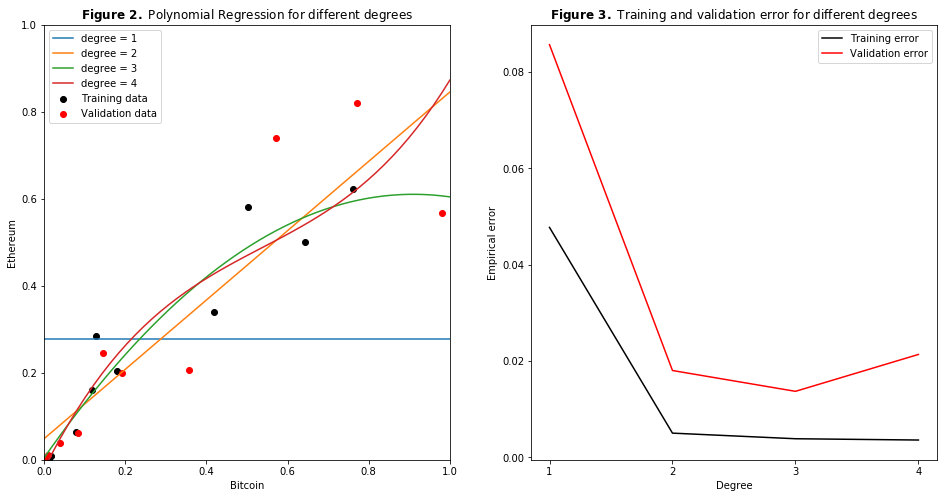

In [2]:
def fit(x, y):
    #Calculate the optimal weight vector
    w_opt = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)),np.transpose(x)), y)
    return w_opt

def feature_mapping(x, degree):
    #compute the feature map for the given degree
    polynomial_features = np.column_stack([x**d for d in range(0,degree)])
    return polynomial_features

def polynomialRegression(x, y, degree):
    X = feature_mapping(x,degree)
    w_opt=fit(X,y)
    return w_opt

def predict(X, w_opt):
    #predict the labels
    y_pred = np.dot(X,w_opt)
    return y_pred

def empirical_risk(X, y, w_opt):
    empirical_error = np.mean(np.power(np.subtract(np.dot(X,w_opt), y),2))
    return empirical_error
                   

#Split the data into a training and validation set. 
#Don't change this.
x_train=x[1::2]
x_val=x[0::2]
y_train=y[1::2]
y_val=y[0::2]

#the degrees we want to loop over
degrees=[1,2,3,4]

def trainValErrors(x_train,y_train,x_val,y_val,degrees):
    ### STUDENT TASK ###
    #compute the optimal weight, training and validation error for each degree in degrees
    w_opts = []
    training_errors=[]
    validation_errors=[]
    for d in degrees:
        w_opt=polynomialRegression(x_train, y_train, d)
        w_opts.append(w_opt)
        training_errors.append(empirical_risk(feature_mapping(x_train,d),y_train,w_opt))
        validation_errors.append(empirical_risk(feature_mapping(x_val,d),y_val,w_opt))
    return w_opts, training_errors,validation_errors

#compute the training and validation errors and display them
w_opts, training_errors, validation_errors = trainValErrors(x_train,y_train,x_val,y_val,degrees)
df_degrees=pd.DataFrame(data={'Degrees':degrees,'Training errors':training_errors,'Validation errors':validation_errors})
display(df_degrees)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)

#plot the predictions for the different degrees
x_plot = np.linspace(0, 1, 50)

plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_val,y_val,color='red',label='Validation data')
for i in range(len(degrees)):
    plt.plot(x_plot, predict(feature_mapping(x_plot,degrees[i]),w_opts[i]), label='degree = %d' %degrees[i]) 
    
plt.title(r'$\bf{Figure\ 2.}$ Polynomial Regression for different degrees')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()

#plot the training and validation errors for the different degrees
ax = fig.add_subplot(122)
plt.plot(degrees,training_errors,color='black',label='Training error')
plt.plot(degrees,validation_errors,color='red',label='Validation error')

plt.title(r'$\bf{Figure\ 3.}$ Training and validation error for different degrees')
plt.ylabel('Empirical error')
plt.xlabel('Degree')
plt.xticks(degrees)
plt.legend()

plt.show()

##  2.2 Regularized Linear Regression

When we increase the number of degrees in the polynomial regression, there is often a higher chance of overfitting. One way to combat this overfitting, is regularization. With regularization we add a term to our cost function which penalizes model complexity. 
In polynomial regression, the model gets more complex if we have a high number of degrees and the weight for each degree has a significant contribution to the prediction, i.e. is significantly large. 
With regularization, we add the squared L2-norm to the loss function, which basically means that the loss gets higher when more weights have overly large values. Hence, the total loss function is a balance between the fit to the data points and the values of the weights.

The mathematical notation of this regularization term is $\lambda \| \mathbf{w} \|^{2}_{2}$ where the larger $\lambda$ (=lambda) is, the more regularization we apply. $\lambda$ is a parameter we can tune and $\lambda \geq 0$. 

Adding the regularization term, our new empirical risk becomes
\begin{equation*}
 \mathcal{E} (\mathbf{w}) = \frac{1}{N}\sum^{N}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2 + \lambda \| \mathbf{w} \|_{2}^{2}
 =\dfrac{1}{N} \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^{2}_{2} + \lambda \| \mathbf{w} \|^{2}_{2}
 \label{eq1}
\tag{1}
\end{equation*}

From this, we can derive the closed-form solution for the optimal weights:

\begin{equation}
\nonumber
\mathbf{w}_{\rm opt} = \text{argmin}_{\mathbf{w} \in  \mathbb{R}^{f}} \big[\dfrac{1}{N} \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^{2}_{2} + \lambda \| \mathbf{w} \|^{2}_{2}\big]
\end{equation}
\begin{equation} 
\Rightarrow\mathbf{w}_{\rm opt} = \frac{1}{N}(\frac{1}{N}\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^{T} \mathbf{y}.
\label{eq2}
\tag{2}
\end{equation} 


### Tasks
1. Implement a Python function `regularizedFit()` which takes as input $\mathbf{X}$, $\mathbf{y}$ and $\lambda$ and returns the optimal weight vector according to (Eq. \ref{eq2}). 
    * You can look at the numpy functions being used in `fit()` of 2.1. 
    * You can use `np.eye()` to generate an identity matrix
2. Implement a Python function `regularizedPolynomialRegression()` which takes as input $\mathbf{x}$,$\mathbf{y}$,$\lambda$ and the degree. It should return the optimal weight vector. 
    * Use `feature_mapping()` from 2.1 to get the feature matrix. 
    * Use `regularizedFit()` to compute the optimal weight vector.
3. Implement a Python function `trainValErrorsRegularization()` which takes as inputs the training data, validation data, the list of lambdas and the degree. And gives as output 3 vectors which contain for every lambda the optimal weight, *w_opts*, the training error, *training_errors* and the validation error, *validation_errors*.
    * You can largely reuse `trainValErrors()` from 2.1. The difference is that you should now loop over the different lambda values, instead of the different degrees. 

,Lambdas,Training errors,Validation errors
0,0.0,0.002970,1.346183
1,0.5,0.033803,0.056465
2,1.0,0.048999,0.076654
3,2.0,0.068277,0.101182
4,5.0,0.092993,0.131519


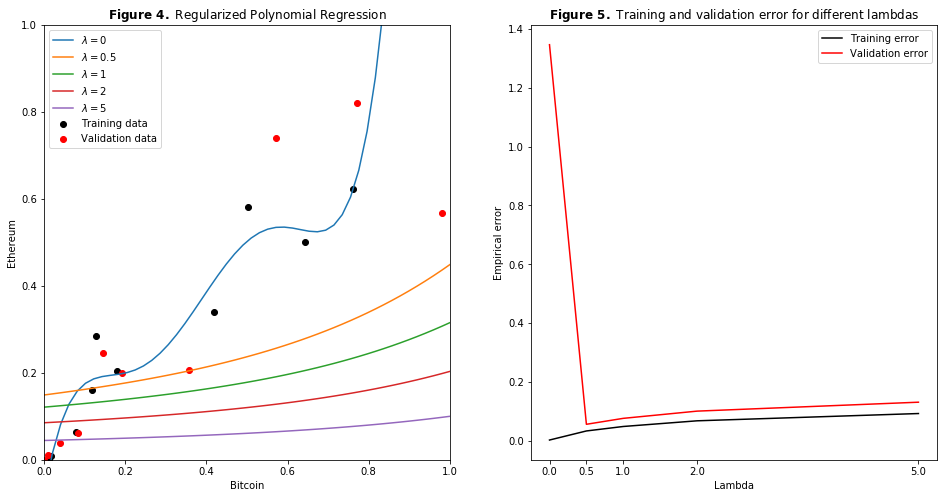

In [3]:
def regularizedFit(X, y,l=0):
    ### STUDENT TASK ###
    N=X.shape[0]
    w_opt = 1/N*np.dot(np.dot(np.linalg.inv(1/N*np.dot(np.transpose(X), X)+l*np.eye(X.shape[1])),np.transpose(X)), y)
    return w_opt

def regularizedPolynomialRegression(x, y, l=0,degree=2):
    ### STUDENT TASK ###
    X = feature_mapping(x,degree)
    w_opt=regularizedFit(X,y,l)
    return w_opt

#specify the degree
degree=6
lambdas = [0,0.5,1, 2, 5] 
    
def trainValErrorsRegularization(x_train,y_train,x_val,y_val,lambdas=[0],degree=2):
    ### STUDENT TASK ###
    #compute the optimal weight, training and validation error for each lambda
    w_opts = []
    training_errors=[]
    validation_errors=[]
    for l in lambdas:
        w_opt=regularizedPolynomialRegression(x_train, y_train, l,degree)
        w_opts.append(w_opt)
        training_errors.append(empirical_risk(feature_mapping(x_train,degree),y_train,w_opt))
        validation_errors.append(empirical_risk(feature_mapping(x_val,degree),y_val,w_opt))
    return w_opts, training_errors,validation_errors

#compute the training and validation errors and display them
w_opts_reg, training_errors_reg, validation_errors_reg = trainValErrorsRegularization(x_train,y_train,x_val,y_val,lambdas,degree=degree)
df_lambdas=pd.DataFrame(data={'Lambdas':lambdas,'Training errors':training_errors_reg,'Validation errors':validation_errors_reg})
display(df_lambdas)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_val,y_val,color='red',label='Validation data')
x_plot = np.linspace(0, 1, 50)
for i in range(len(lambdas)):
    plt.plot(x_plot, predict(feature_mapping(x_plot,degree),w_opts_reg[i]), label='$ \lambda=%s$' %str(lambdas[i])) 
    
plt.title(r'$\bf{Figure\ 4.}$ Regularized Polynomial Regression')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()

#plot the training and validation errors for the different values of lambda
ax=fig.add_subplot(122)
plt.plot(lambdas,training_errors_reg,color='black',label='Training error')
plt.plot(lambdas,validation_errors_reg,color='red',label='Validation error')

plt.title(r'$\bf{Figure\ 5.}$ Training and validation error for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Empirical error')
plt.xticks(lambdas)
plt.legend()
plt.show()
